In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

archivo_csv = "MatrizTMXV.csv"
datos = pd.read_csv(archivo_csv)

print(datos)

        ID_CIDERH REGION   FECHA_RBE  TEMP_MIN_RBE     LAT_Y      LON_X
0      M_001_A_XV     XV  1996-01-01           7.6 -18.83571 -69.745881
1      M_001_A_XV     XV  1996-01-02           9.0 -18.83571 -69.745881
2      M_001_A_XV     XV  1996-01-03           7.8 -18.83571 -69.745881
3      M_001_A_XV     XV  1996-01-04           7.8 -18.83571 -69.745881
4      M_001_A_XV     XV  1996-01-05           8.4 -18.83571 -69.745881
...           ...    ...         ...           ...       ...        ...
56499    M_201_AA     XV  2010-07-18          14.2 -18.46700 -70.167000
56500    M_201_AA     XV  2010-08-12          14.5 -18.46700 -70.167000
56501    M_201_AA     XV  2010-08-15          12.0 -18.46700 -70.167000
56502    M_201_AA     XV  2010-08-27          14.2 -18.46700 -70.167000
56503    M_202_AA     XV  2006-05-27          18.1 -18.47000 -70.170000

[56504 rows x 6 columns]


ID_CIDERH   M_006_A_XV  M_010_A_XV  M_015_A_XV  M_020_A_XV
ID_CIDERH                                                 
M_006_A_XV    1.000000    0.558366    0.470168    0.682643
M_010_A_XV    0.558366    1.000000    0.666046    0.608073
M_015_A_XV    0.470168    0.666046    1.000000    0.619773
M_020_A_XV    0.682643    0.608073    0.619773    1.000000


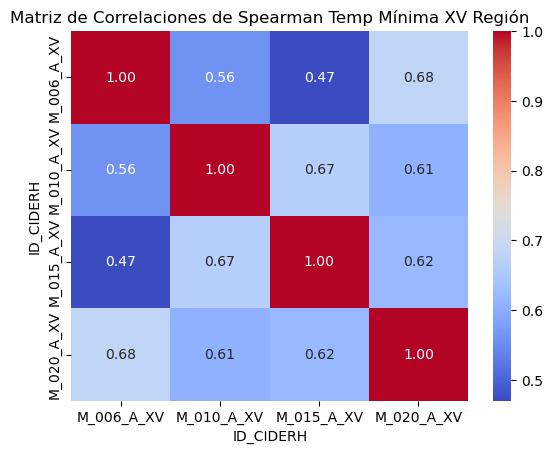

Cantidad de datos de TEMP_MIN_RBE por estación:
ID_CIDERH
M_006_A_XV    1216
M_010_A_XV    4912
M_015_A_XV    5124
M_020_A_XV    5493
Name: TEMP_MIN_RBE, dtype: int64


In [2]:
# Lista de estaciones específicas
estaciones_especificas = ['M_010_A_XV', 'M_020_A_XV', 'M_006_A_XV', 'M_015_A_XV']

# Filtra los datos para las estaciones específicas
datos_especificos = datos[datos['ID_CIDERH'].isin(estaciones_especificas)]

# Pivotar los datos para obtener una matriz de temperaturas mínimas por fecha y estación
matriz_temp_min = datos_especificos.pivot(index='FECHA_RBE', columns='ID_CIDERH', values='TEMP_MIN_RBE')

# Calcular la matriz de correlaciones de Spearman
matriz_correlaciones = matriz_temp_min.corr(method='spearman')

# Mostrar la matriz de correlaciones
print(matriz_correlaciones)

# Visualizar la matriz de correlaciones con un mapa de calor usando seaborn
sns.heatmap(matriz_correlaciones, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlaciones de Spearman Temp Mínima XV Región')
plt.show()

# Contar la cantidad de datos de TEMP_MIN_RBE para cada estación seleccionada
cantidad_datos_temp_min_por_estacion = datos_especificos.groupby('ID_CIDERH')['TEMP_MIN_RBE'].count()

# Mostrar la cantidad de datos para cada estación
print("Cantidad de datos de TEMP_MIN_RBE por estación:")
print(cantidad_datos_temp_min_por_estacion)